# Hw9

In [1]:
from tensorflow import keras


## 1.Підготовка та аналіз даних

### Завантажуємо датасет та поділяємо його на тренувальний та тестовий набори

In [2]:
from keras.datasets import fashion_mnist

dataset = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


### Визначаємо назви класів

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Виведемо випадкове зображення з тренувального датасету

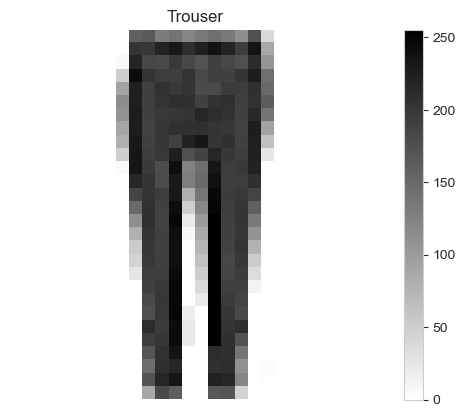

In [4]:
import random
import matplotlib.pyplot as plt

class_number = random.randint(0, len(x_train))
plt.imshow(x_train[class_number], cmap='binary')
plt.title(class_names[y_train[class_number]])
plt.axis('off')
plt.colorbar()
plt.gca().grid(False)

### Нормалізуємо дані

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Виведемо перші 25 зображень, щоб впевнитися, що навчальний набір відповідає назвам класів

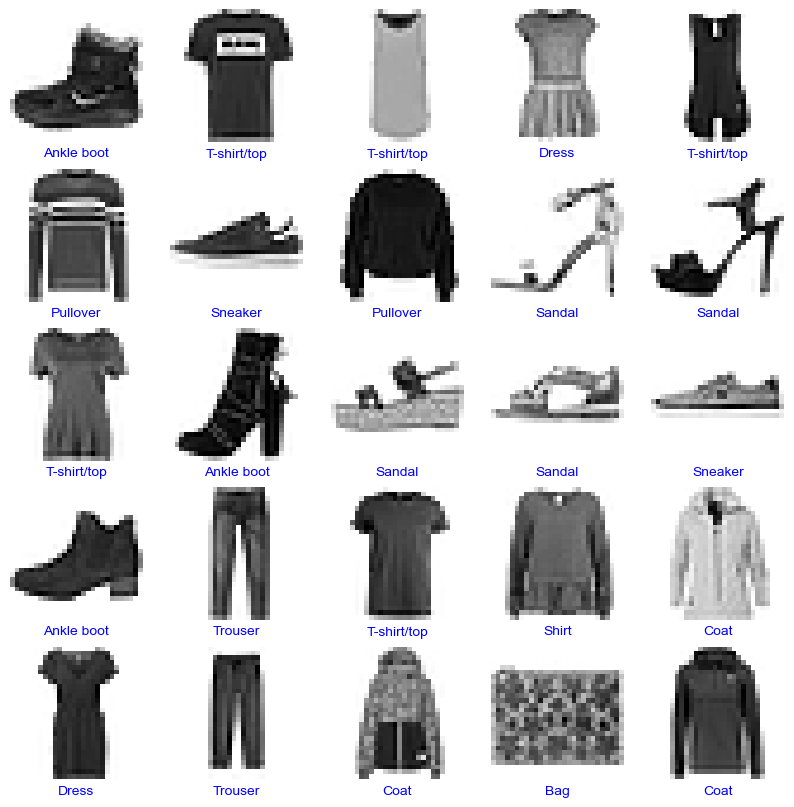

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(x_train[i], cmap="binary")
    ax.set_xlabel(class_names[y_train[i]], color="blue")
    ax.set_frame_on(False)
plt.show()

### Функція візуалізації кривих навчання

In [7]:
import matplotlib.pyplot as plt


def plot_history(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    acc_values = history_dict["accuracy"]
    val_acc_values = history_dict["val_accuracy"]

    epochs = range(1, len(acc_values) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss_values, color="r", label="Training loss")
    plt.plot(epochs, acc_values, "b", label="Training accuracy")
    plt.plot(epochs, val_loss_values, "r:", label="Validation loss")
    plt.plot(epochs, val_acc_values, "b:", label="Validation accuracy")

    plt.title("Training loss and accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

## Визначаємо функцію для візуальної оцінки результату передбачень

In [8]:
import numpy as np


def visualize_prediction(predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        label = np.random.randint(0, len(predictions))
        ax.imshow(x_test[label], cmap="binary")
        ax.set_xlabel(class_names[y_train[i]], color="blue")
        ax.set_frame_on(False)

        predicted_label = np.argmax(predictions[label])
        true_label = y_test[label]
        if predicted_label == true_label:
            color = "green"
        else:
            color = "red"
        plt.xlabel(f"{class_names[predicted_label]}({class_names[true_label]})",
                   color=color)


## 2. Побудова та аналіз найпростішої моделі

### Функція ініціалізації найпростішої моделі для запобігання впливу ваг попередньої моделі на процес навчання 

In [9]:
def initialize_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [10]:
def model_eval(model):
    model_loss, model_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {model_acc:.2f}')

### Будуємо першу примітивну модель з одним вхідним, одним прихованим та одним вихідним шарами

Epoch 1/20


c:\Users\the10\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7683 - loss: 0.6735 - val_accuracy: 0.8451 - val_loss: 0.4405
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8601 - loss: 0.3849 - val_accuracy: 0.8658 - val_loss: 0.3783
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3434 - val_accuracy: 0.8696 - val_loss: 0.3602
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8833 - loss: 0.3180 - val_accuracy: 0.8635 - val_loss: 0.3642
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8876 - loss: 0.3026 - val_accuracy: 0.8712 - val_loss: 0.3675
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8961 - loss: 0.2825 - val_accuracy: 0.8769 - val_loss: 0.3406
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9026 - loss: 0.2690 - val_accuracy: 0.8748 - val_loss: 0.3437
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9047 - loss: 0.2570 - val_accurac

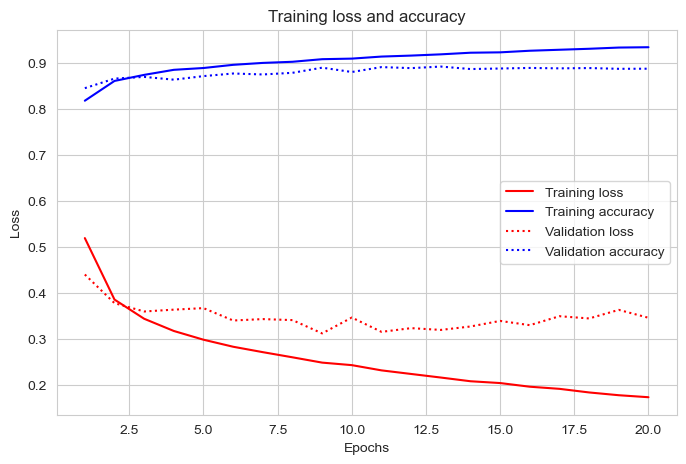

In [11]:
simple_model = initialize_model()
simple_model_history = simple_model.fit(x_train, y_train, epochs=20, validation_split=0.2)
model_eval(simple_model)
plot_history(simple_model_history)

на графіку видно велику різницю між втратами на навчальних даних і втратами на валідаційних, що свідчить про недостатню якість моделі

In [42]:
model_eval(simple_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8801 - loss: 0.3634
Test accuracy: 0.88


### Візуалізуємо результат для першої моделі на випадко обраних зображеннях

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


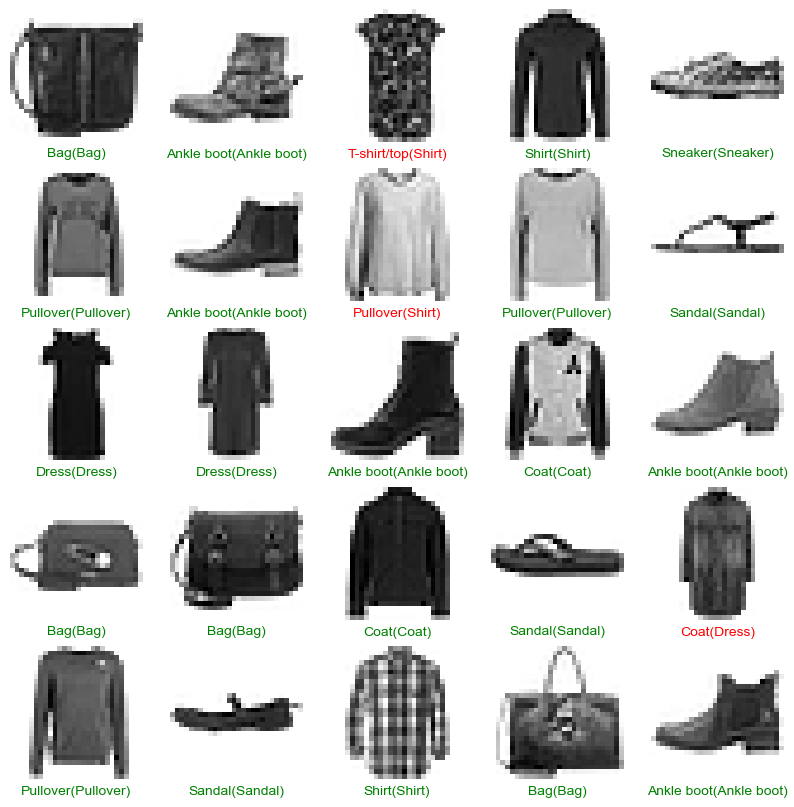

In [12]:
visualize_prediction(simple_model.predict(x_test))

Висновок: модель на практиці показує досить високий результат на валідаційних даних, хоча показники втрат на графіку і свідчать про можливе перенавчання.

### Дослідимо вплив розміру батчу на результати навчання

In [13]:
from time import time

summary = []
batch_sizes = [32, 64, 128, 256, 512]
for batch_size in batch_sizes:
    model = initialize_model()
    model_name = model.__dict__['name']
    print(f'\nTraining {model_name} with batch size {batch_size}')
    print("-" * 50)
    start = time()
    history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)
    end = time()
    elapsed_in = (end - start)
    print("-" * 50)
    print(f'Training time: {elapsed_in:.2f} seconds')
    test_loss, test_acc = model.evaluate(x_test, y_test)

    train_accuracy = history.history['accuracy'][-1]
    train_loss = history.history['loss'][-1]
    model_val_accuracy = history.history['val_accuracy'][-1]
    model_val_loss = history.history['val_loss'][-1]

    summary.append(
        {"batch_size": batch_size, "model_name": model_name, "train_accuracy": train_accuracy, "train_loss": train_loss,
         "model_val_accuracy": model_val_accuracy, "model_val_loss": model_val_loss, "test_loss": test_loss,
         "test_acc": test_acc, "elapsed_in": elapsed_in})
print("=" * 50)
print('End of training')


Training sequential_1 with batch size 32
--------------------------------------------------
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7792 - loss: 0.6495 - val_accuracy: 0.8475 - val_loss: 0.4310
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8591 - loss: 0.4013 - val_accuracy: 0.8637 - val_loss: 0.3797
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8734 - loss: 0.3493 - val_accuracy: 0.8792 - val_loss: 0.3461
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8834 - loss: 0.3207 - val_accuracy: 0.8762 - val_loss: 0.3493
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.2989 - val_accuracy: 0.8701 - val_loss: 0.3647
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8912 - loss: 0.2916 - val_accuracy: 0.8779 - val_loss: 0.3323
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8996 - loss: 0.2730 - val_accuracy: 0.8888 - val_loss: 0.31

In [14]:
import pandas as pd

summary_df = pd.DataFrame(summary)
summary_df


,batch_size,model_name,train_accuracy,train_loss,model_val_accuracy,model_val_loss,test_loss,test_acc,elapsed_in
0,32,sequential_1,0.932854,0.180138,0.889583,0.350272,0.383202,0.8832,35.456752
1,64,sequential_2,0.933062,0.182917,0.890750,0.338529,0.364803,0.8818,19.156075
2,128,sequential_3,0.925375,0.202724,0.892000,0.315734,0.343427,0.8863,10.980158
3,256,sequential_4,0.918750,0.226754,0.889500,0.309479,0.334911,0.8811,7.293177
4,512,sequential_5,0.907521,0.257623,0.881667,0.326420,0.348351,0.8777,5.552010


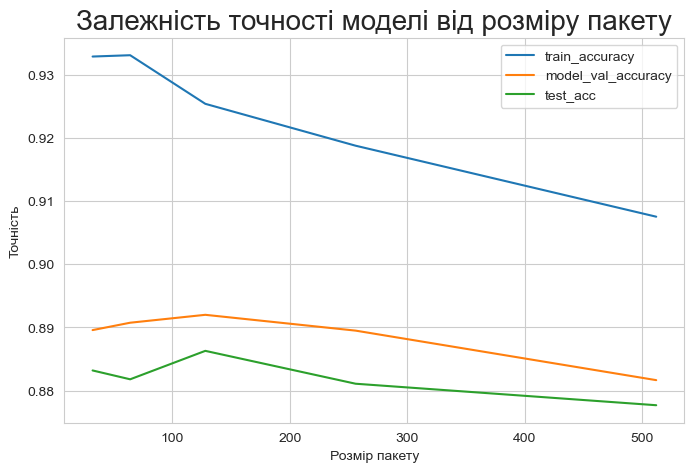

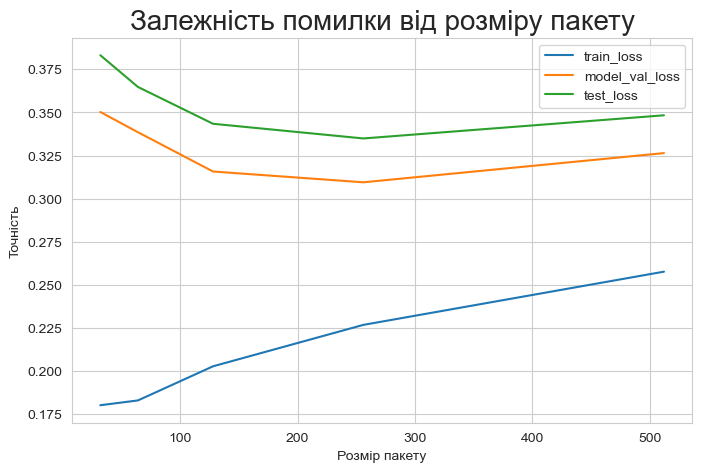

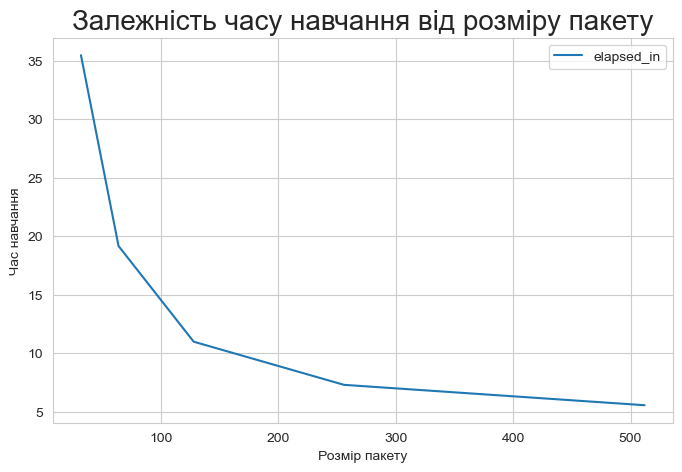

In [15]:


plt.figure(figsize=(8, 5))
plt.title("Залежність точності моделі від розміру пакету", size=20)
plt.xlabel("Розмір пакету")
plt.ylabel("Точність")
plt.plot(summary_df["batch_size"], summary_df["train_accuracy"], label="train_accuracy")
plt.plot(summary_df["batch_size"], summary_df["model_val_accuracy"], label="model_val_accuracy")
plt.plot(summary_df["batch_size"], summary_df["test_acc"], label="test_acc")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Залежність помилки від розміру пакету", size=20)
plt.xlabel("Розмір пакету")
plt.ylabel("Точність")
plt.plot(summary_df["batch_size"], summary_df["train_loss"], label="train_loss")
plt.plot(summary_df["batch_size"], summary_df["model_val_loss"], label="model_val_loss")
plt.plot(summary_df["batch_size"], summary_df["test_loss"], label="test_loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Залежність часу навчання від розміру пакету", size=20)
plt.xlabel("Розмір пакету")
plt.ylabel("Час навчання")
plt.plot(summary_df["batch_size"], summary_df["elapsed_in"], label="elapsed_in")
plt.legend()
plt.show()

### Висновок: збільшення розміру пакету негативно впливає на ефективність навчання, але значно його прискорює 

## Розширена модель з додатковими шарами

### збільшимо кількість шарів та додамо шар Dropout для запобігання перенавчанню та додатковий шар Dense для збільшення складності моделі

In [16]:
def compile_model(model, optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]):
    new_model = keras.models.clone_model(model)
    new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return new_model

In [17]:
model_adv = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\the10\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
optimizer_adam = keras.optimizers.Adam(learning_rate=0.0001)
model_adam_lr0001 = compile_model(model_adv, optimizer_adam, loss="sparse_categorical_crossentropy")

In [19]:
history_model_adam_lr0001 = model_adam_lr0001.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6322 - loss: 1.1209 - val_accuracy: 0.8238 - val_loss: 0.5189
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8167 - loss: 0.5302 - val_accuracy: 0.8357 - val_loss: 0.4640
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8287 - loss: 0.4853 - val_accuracy: 0.8456 - val_loss: 0.4447
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8418 - loss: 0.4456 - val_accuracy: 0.8531 - val_loss: 0.4227
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8500 - loss: 0.4232 - val_accuracy: 0.8503 - val_loss: 0.4107
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.4158 - val_accuracy: 0.8655 - val_loss: 0.3851
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.4021 - val_accuracy: 0.8701 - val_loss: 0.3698
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3869 - 

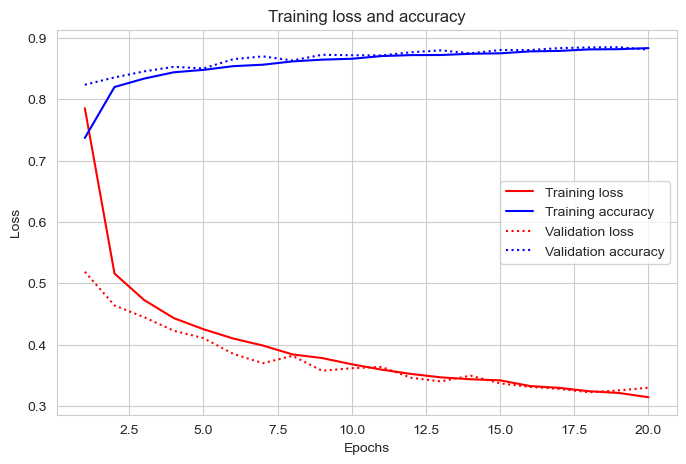

In [20]:
plot_history(history_model_adam_lr0001)

In [21]:
model_eval(model_adam_lr0001)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8728 - loss: 0.3479
Test accuracy: 0.87


З графіків видно, що модель менше схильна до перенавчання, а показники точності і втрат показують схожі тенденції на навчальних і валідаційних даних, або навіть майже збігаються. Схоже, що це вплив шару dropout. Також вони близькі до результатів, отриманих на тестових даних. Але точність моделі не зовсім задовільна. Спробуємо покращити її.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


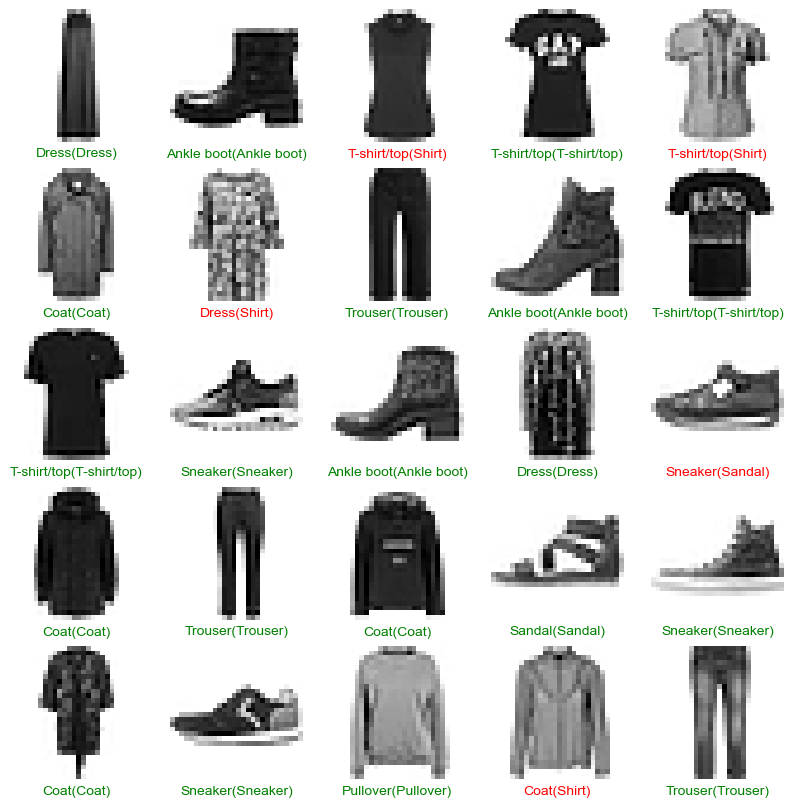

In [22]:
predictions_adv = model_adam_lr0001.predict(x_test)
visualize_prediction(predictions_adv)

бачимо, що процент помилок приблизно той же, що і у попередньої моделі.  

## Знаходження оптимальних параметрів моделі за допомогою callback-функцій

спробуємо знайти найкращі параметри моделі за допомогою коллбек-функцій

In [23]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=10, monitor="val_loss", verbose=1)


def define_checkpoint(name="best_model"):
    checkpoint = ModelCheckpoint(f"{name}.keras", monitor="val_loss", save_best_only=True, verbose=1)
    return checkpoint


checkpoint = define_checkpoint()
callbacks = [
    early_stopping,
    checkpoint
]
adam_lr0001_callbacks = compile_model(model_adam_lr0001)
history_with_callbacks = adam_lr0001_callbacks.fit(x_train, y_train, validation_split=0.2, epochs=100,
                                                   callbacks=callbacks,
                                                   batch_size=32)

Epoch 1/100
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7504 - loss: 0.7003
Epoch 1: val_loss improved from inf to 0.41501, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7506 - loss: 0.6999 - val_accuracy: 0.8497 - val_loss: 0.4150
Epoch 2/100
1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.4312
Epoch 2: val_loss improved from 0.41501 to 0.38293, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8432 - loss: 0.4309 - val_accuracy: 0.8633 - val_loss: 0.3829
Epoch 3/100
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3990
Epoch 3: val_loss improved from 0.38293 to 0.37264, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.3990 - val_accuracy: 0.8627 - val_loss: 0.3726
Epoch 4/100
1467/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3617
Epoch 4: val_loss improved from 0.37

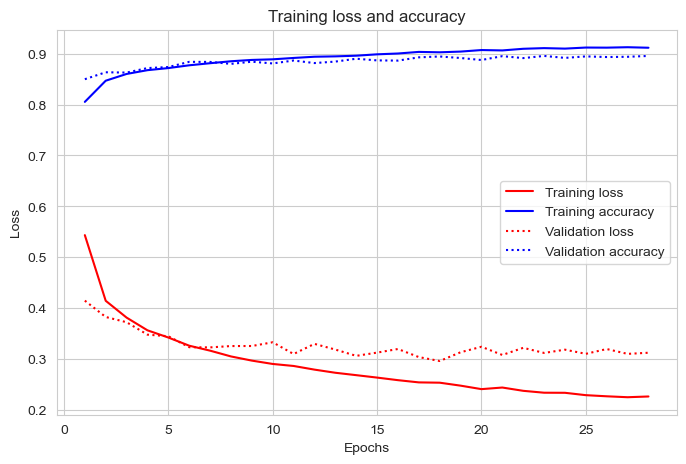

In [24]:
plot_history(history_with_callbacks)

In [25]:
best_model = keras.models.load_model("best_model.keras")
model_eval(best_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8856 - loss: 0.3152
Test accuracy: 0.89


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


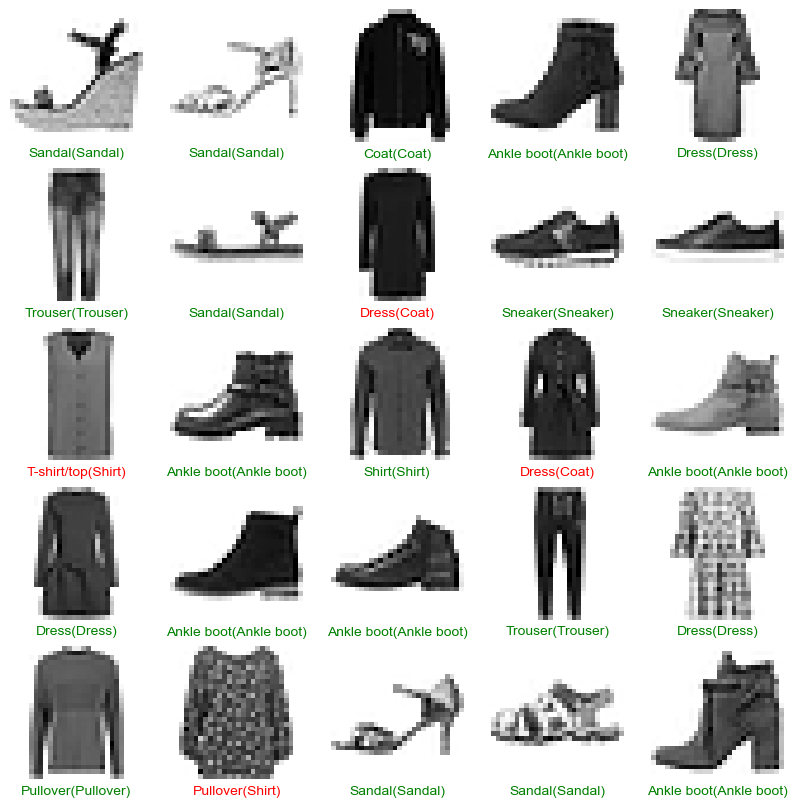

In [26]:
visualize_prediction(best_model.predict(x_test))

## Дослідимо вплив learning rate на результати навчання


In [27]:
optimizer_adam2 = keras.optimizers.Adam(learning_rate=0.001)
compile_model(model_adv, optimizer_adam2, loss="sparse_categorical_crossentropy")
callbacks[1] = define_checkpoint('adam2')
history_with_adam2 = model_adam_lr0001.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=callbacks,
                                           batch_size=32, verbose=1)


Epoch 1/100
1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3143
Epoch 1: val_loss improved from inf to 0.31951, saving model to adam2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8867 - loss: 0.3142 - val_accuracy: 0.8863 - val_loss: 0.3195
Epoch 2/100
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8862 - loss: 0.3082
Epoch 2: val_loss improved from 0.31951 to 0.31658, saving model to adam2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8862 - loss: 0.3083 - val_accuracy: 0.8874 - val_loss: 0.3166
Epoch 3/100
1493/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8885 - loss: 0.3042
Epoch 3: val_loss improved from 0.31658 to 0.31365, saving model to adam2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8885 - loss: 0.3042 - val_accuracy: 0.8846 - val_loss: 0.3137
Epoch 4/100
1468/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8894 - loss: 0.3009
Epoch 4: val_loss improved from 0.31365 to 0.31333,

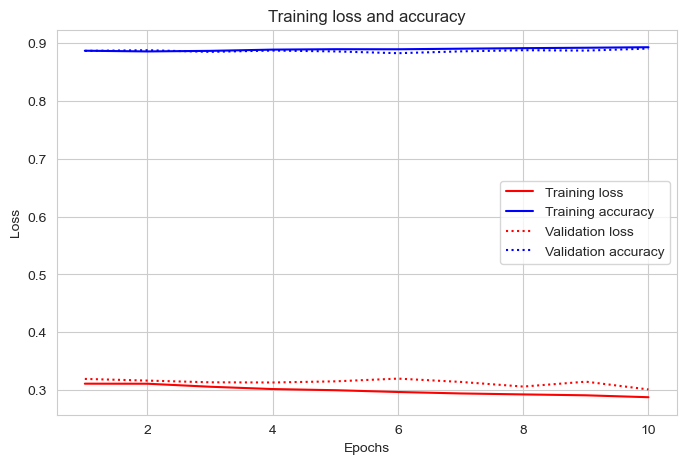

In [28]:
plot_history(history_with_adam2)

модель з lr=0.001 показує менше ознак перенавчання, криві навчання навчальних і валідаційних даних майже збігаються, але точність передбачень виша у моделі з lr=0.0001

In [29]:
best_adam2 = keras.models.load_model("adam2.keras")
model_eval(best_adam2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8828 - loss: 0.3196
Test accuracy: 0.88


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


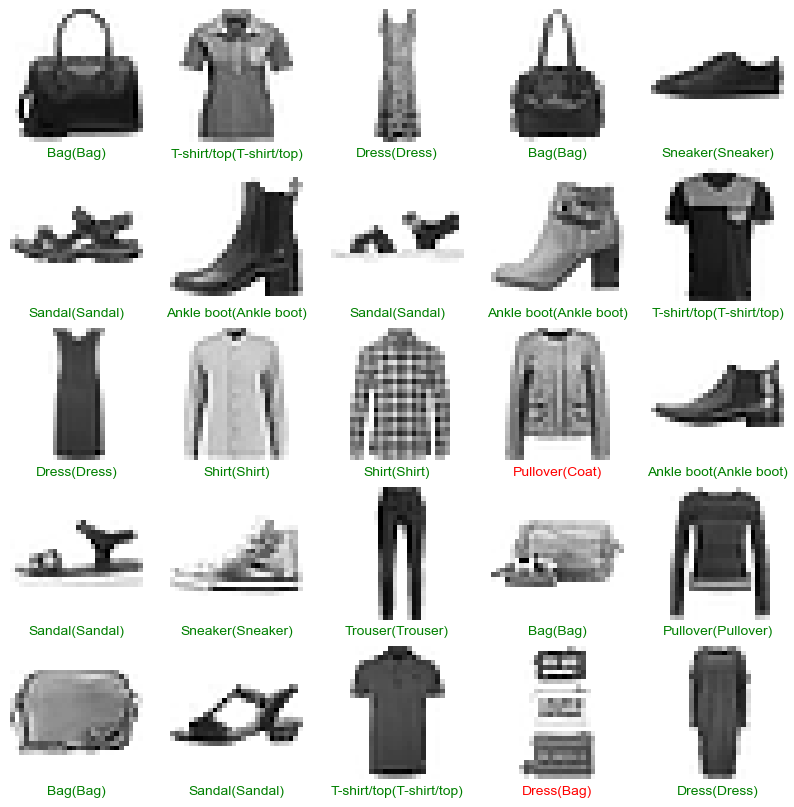

In [30]:
visualize_prediction(best_adam2.predict(x_test))

## RMSprop 

In [31]:
optimizer_rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)

model_rmsprop1 = compile_model(model_adv, optimizer_rmsprop)
callbacks[1] = define_checkpoint('rmsprop1')
history_with_RMSprop = model_rmsprop1.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=callbacks,
                                          batch_size=32, verbose=1)

Epoch 1/100
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7464 - loss: 0.6982
Epoch 1: val_loss improved from inf to 0.43040, saving model to rmsprop1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7466 - loss: 0.6975 - val_accuracy: 0.8403 - val_loss: 0.4304
Epoch 2/100
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.4295
Epoch 2: val_loss improved from 0.43040 to 0.40290, saving model to rmsprop1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8433 - loss: 0.4294 - val_accuracy: 0.8544 - val_loss: 0.4029
Epoch 3/100
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.3959
Epoch 3: val_loss improved from 0.40290 to 0.40185, saving model to rmsprop1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8575 - loss: 0.3959 - val_accuracy: 0.8632 - val_loss: 0.4019
Epoch 4/100
1455/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8616 - loss: 0.3826
Epoch 4: val_loss improved from 0.40185 to

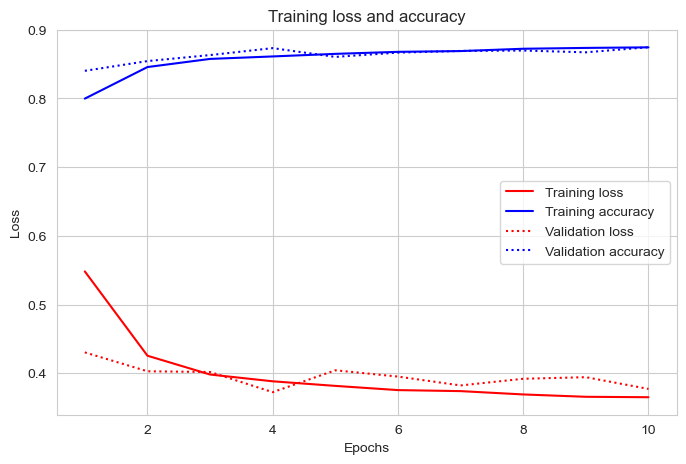

In [32]:
plot_history(history_with_RMSprop)

In [33]:
best_rmsprop1 = keras.models.load_model("rmsprop1.keras")
model_eval(best_rmsprop1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8650 - loss: 0.3884
Test accuracy: 0.86


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


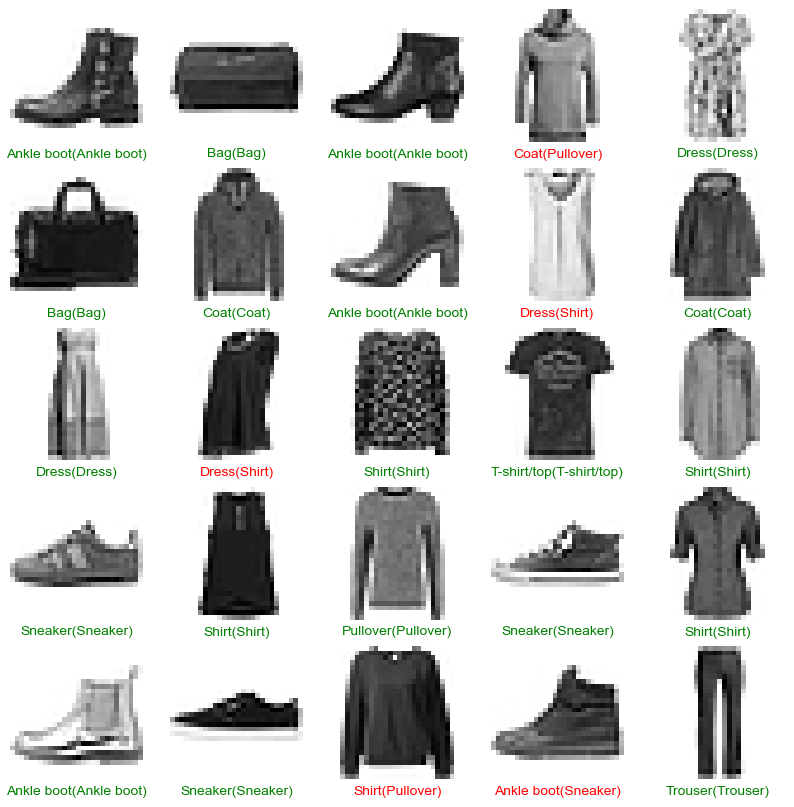

In [34]:
visualize_prediction(best_rmsprop1.predict(x_test))

In [35]:
optimizer_rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
callbacks[1] = define_checkpoint('rmsprop2')
model_rmsprop2 = compile_model(model_adv, optimizer_rmsprop)
history_with_RMSprop = model_rmsprop2.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=callbacks,
                                          batch_size=32, verbose=1)

Epoch 1/100
1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6452 - loss: 1.0951
Epoch 1: val_loss improved from inf to 0.52466, saving model to rmsprop2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6471 - loss: 1.0886 - val_accuracy: 0.8188 - val_loss: 0.5247
Epoch 2/100
1466/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.5458
Epoch 2: val_loss improved from 0.52466 to 0.46384, saving model to rmsprop2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8115 - loss: 0.5453 - val_accuracy: 0.8374 - val_loss: 0.4638
Epoch 3/100
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.4834
Epoch 3: val_loss improved from 0.46384 to 0.43203, saving model to rmsprop2.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8288 - loss: 0.4833 - val_accuracy: 0.8470 - val_loss: 0.4320
Epoch 4/100
1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.4700
Epoch 4: val_loss improved from 0.43203 to

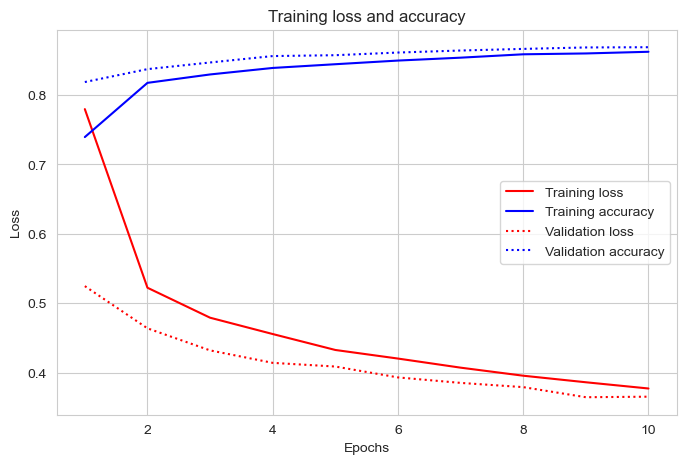

In [36]:
plot_history(history_with_RMSprop)

In [37]:
best_rmsprop2 = keras.models.load_model("rmsprop2.keras")
model_eval(best_rmsprop2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8674 - loss: 0.3774
Test accuracy: 0.86


## Висновок: в даних тестах моделі з оптимізатором RMSprop показали гіршу точність ніж з оптимізатором Adam. 

## SGD

In [38]:
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.001)

model_sgd = compile_model(model_adv, optimizer_sgd)
callbacks[1] = define_checkpoint('best_SGD')

history_with_SGD = model_sgd.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=callbacks, batch_size=32,
                                 verbose=1)

Epoch 1/100
1469/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.3135 - loss: 2.0042
Epoch 1: val_loss improved from inf to 1.19590, saving model to best_SGD.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3166 - loss: 1.9981 - val_accuracy: 0.6433 - val_loss: 1.1959
Epoch 2/100
1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.6334 - loss: 1.1458
Epoch 2: val_loss improved from 1.19590 to 0.88279, saving model to best_SGD.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6337 - loss: 1.1446 - val_accuracy: 0.6923 - val_loss: 0.8828
Epoch 3/100
1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6866 - loss: 0.9071
Epoch 3: val_loss improved from 0.88279 to 0.76473, saving model to best_SGD.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6868 - loss: 0.9066 - val_accuracy: 0.7308 - val_loss: 0.7647
Epoch 4/100
1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7211 - loss: 0.7932
Epoch 4: val_loss improved from 0.

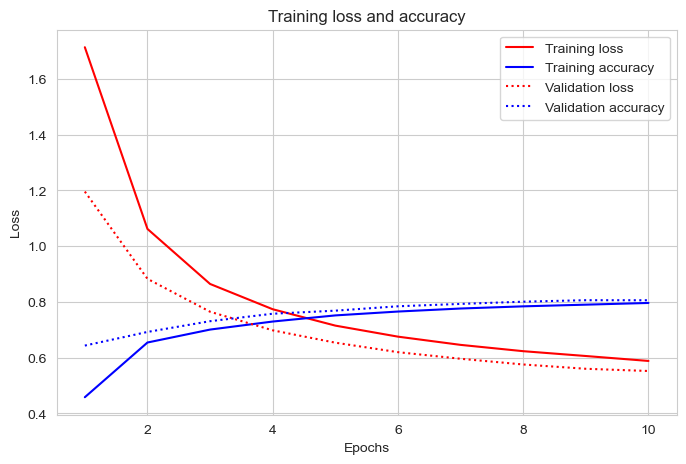

In [39]:
plot_history(history_with_SGD)

In [40]:
best_SGD = keras.models.load_model("best_SGD.keras")
model_eval(best_SGD)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8012 - loss: 0.5645
Test accuracy: 0.80


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


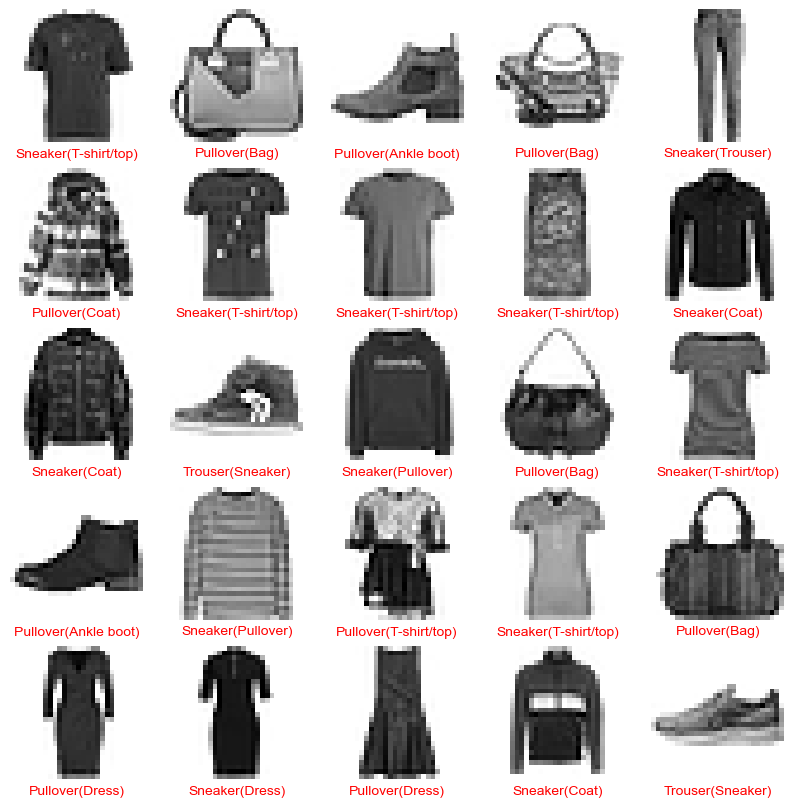

In [41]:
visualize_prediction(model_adv.predict(x_test))

### Висновок: оптимізатор SGD здається не дуже підходить для задач цього типу.

## Загальний висновок: різні гіперпараметри можуть суттєво впливати на результати навчання. Їх підбір потребує багато часу та досвіду. )